In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Load the data
df_auc = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Output/csv/prematurity_AUC_by_region_1205.csv")  
df_region = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Program/2025_rmenasria_prematurity/notebooks/racim/all_regions_gravity_center_shifts_utrecht_pclean.csv")  


In [41]:
region_list=df_region["region"].values
print("Region list",region_list)
print("Number of regions", len(region_list))

regions_list=df_auc["region"].values 
regions_list=[ x for x in regions_list if x.endswith("left")]
print("Regions list", regions_list)
print("Number of regions", len(regions_list))

Region list ['S.T.s.-S.GSM._left' 'S.F.int.-F.C.M.ant._right' 'Sc.Cal.-S.Li._left'
 'F.I.P.-F.I.P.Po.C.inf._left' 'S.F.inter.-S.F.sup._right'
 'S.Or.-S.Olf._left' 'Lobule_parietal_sup._left' 'OCCIPITAL_right'
 'S.Po.C._left' 'S.F.marginal-S.F.inf.ant._left'
 'S.F.marginal-S.F.inf.ant._right' 'F.P.O.-S.Cu.-Sc.Cal._left'
 'S.T.s.br._right' 'S.F.int.-S.R._right' 'S.T.s.-S.GSM._right'
 'S.Pe.C._left' 'S.C.-S.Pe.C._right' 'CINGULATE._right' 'deMatos._left'
 'S.F.int.-F.C.M.ant._left' 'S.C.-sylv._right' 'deMatos._right'
 'S.T.s.br._left' 'S.T.i.-S.T.s.-S.T.pol._left' 'F.I.P._left'
 'S.F.median-S.F.pol.tr.-S.F.sup._left' 'F.P.O.-S.Cu.-Sc.Cal._right'
 'F.C.M.post.-S.p.C._left' 'fronto-parietal_medial_face._right'
 'F.C.L.p.-subsc.-F.C.L.a.-INSULA._left' 'S.C.-S.Pe.C._left'
 'S.F.inter.-S.F.sup._left' 'Lobule_parietal_sup._right'
 'F.Coll.-S.Rh._left' 'S.F.inf.-BROCA-S.Pe.C.inf._left' 'F.I.P._right'
 'OCCIPITAL_left' 'deMatos_polar._right' 'S.Or.-S.Olf._right'
 'F.C.L.p.-subsc.-F.C.L.a.-INSULA.

In [42]:
df_region["region_clean"] = df_region["region"].str.replace(r"\.", "", regex=True)
df_auc["region_clean"] = df_auc["region"].str.replace(r"\.", "", regex=True)
df_auc_left = df_auc[df_auc["region_clean"].str.endswith("_left")].copy()


Nombre de régions pour lesquelles l'AUC n'a pas été trouvée : 39


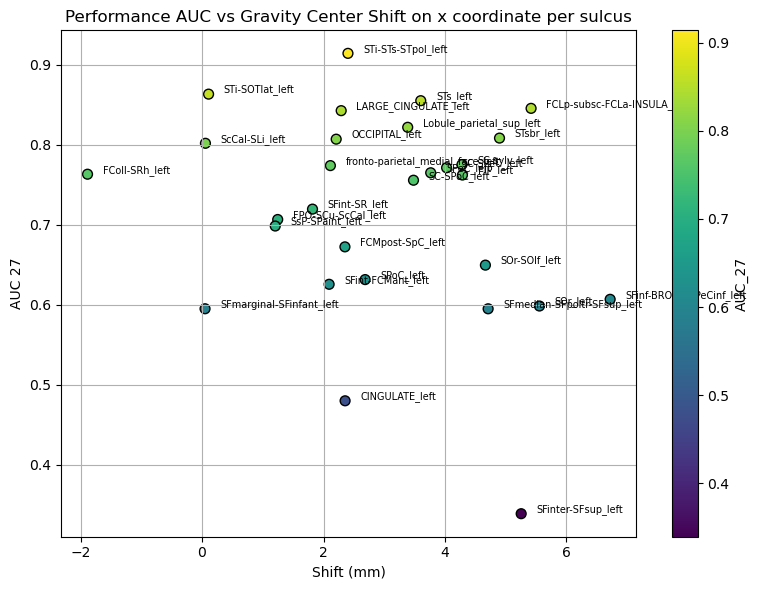

In [55]:
df_plot = df_region.merge(
    df_auc_left[["region_clean", "AUC_27"]],
    on="region_clean",
    how="left"
)

# À ce stade, regardons combien de lignes n'ont pas trouvé de correspondance :
missing_mask = df_plot["AUC_27"].isna()
print("\nNombre de régions pour lesquelles l'AUC n'a pas été trouvée :", missing_mask.sum())


# Tracer le scatter plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    df_plot['shift_x'], 
    df_plot['AUC_27'], 
    c=df_plot['AUC_27'], 
    cmap='viridis', 
    s=50, 
    edgecolor='k'
)
plt.colorbar(sc, label='AUC_27')


for _, row in df_plot.iterrows():
    plt.text(
        row['shift_x'] + 0.25,
        row['AUC_27'] + 0.002,
        row['region_clean'],
        fontsize=7)
    

plt.xlabel("Shift (mm)")
plt.ylabel("AUC 27")
plt.title("Performance AUC vs Gravity Center Shift on x coordinate per sulcus")
plt.grid(True)
plt.tight_layout()
plt.show()